In [32]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()


def analyze_sentiment(text):
    if not isinstance(text, str):
        return "Neutral"
    sentiment_scores = sia.polarity_scores(text)
    compound_score = sentiment_scores['compound']
    
    if compound_score >= 0.05:
        return "Positive"
    elif compound_score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df = pd.read_csv('reddit_clean.csv')

print(df.head())

df['title_sentiment'] = df['title'].apply(analyze_sentiment)
df['text_sentiment'] = df['selftext'].apply(analyze_sentiment)

df.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/alirezaarvandi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


        id  created_utc                                              title  \
0  15wh5a1   1692551986                                              fires   
1  15vvis1   1692488876  ‘we are an army out there’: west kelowna fire ...   
2  15vtdzk   1692483496  fire progression from 15-19th august. nasa fir...   
3  15u8bf1   1692327644                                 it's very very bad   
4  15u7jfa   1692325530  time laps of west kelowna fire. view from lake...   

                                            selftext  subreddit  \
0  they should hire people 24/7 in forest around ...  KelownaBC   
1                                                     KelownaBC   
2                                                     KelownaBC   
3  right now i am on top of knox. it looks very v...  KelownaBC   
4                                 be safe everyone.   KelownaBC   

                                           permalink  
0  https://www.reddit.com/r/KelownaBC/comments/15...  
1  https://www.red

,id,created_utc,title,selftext,subreddit,permalink,title_sentiment,text_sentiment
0,15wh5a1,1692551986,fires,they should hire people 24/7 in forest around ...,KelownaBC,https://www.reddit.com/r/KelownaBC/comments/15...,Neutral,Positive
1,15vvis1,1692488876,‘we are an army out there’: west kelowna fire ...,,KelownaBC,https://www.reddit.com/r/KelownaBC/comments/15...,Negative,Neutral
2,15vtdzk,1692483496,fire progression from 15-19th august. nasa fir...,,KelownaBC,https://www.reddit.com/r/KelownaBC/comments/15...,Negative,Neutral
3,15u8bf1,1692327644,it's very very bad,right now i am on top of knox. it looks very v...,KelownaBC,https://www.reddit.com/r/KelownaBC/comments/15...,Negative,Negative
4,15u7jfa,1692325530,time laps of west kelowna fire. view from lake...,be safe everyone.,KelownaBC,https://www.reddit.com/r/KelownaBC/comments/15...,Negative,Positive


In [38]:
df = df[df['created_utc'] >= 1677654056]
print(df.head())
df['time'] = pd.to_datetime(df['created_utc'], unit='s')

        id  created_utc                                              title  \
0  15wh5a1   1692551986                                              fires   
1  15vvis1   1692488876  ‘we are an army out there’: west kelowna fire ...   
2  15vtdzk   1692483496  fire progression from 15-19th august. nasa fir...   
3  15u8bf1   1692327644                                 it's very very bad   
4  15u7jfa   1692325530  time laps of west kelowna fire. view from lake...   

                                            selftext  subreddit  \
0  they should hire people 24/7 in forest around ...  KelownaBC   
1                                                     KelownaBC   
2                                                     KelownaBC   
3  right now i am on top of knox. it looks very v...  KelownaBC   
4                                 be safe everyone.   KelownaBC   

                                           permalink title_sentiment  \
0  https://www.reddit.com/r/KelownaBC/comments/15...    

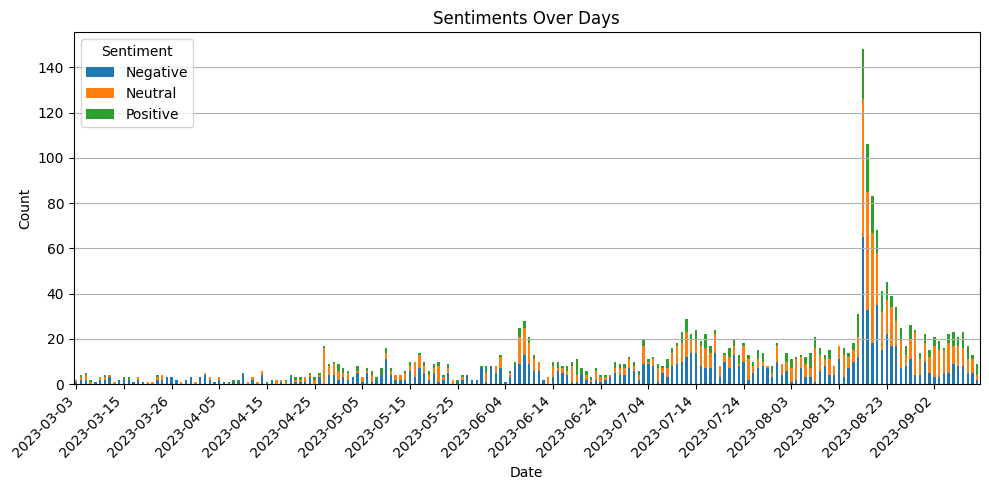

In [41]:
import matplotlib.pyplot as plt


daily_sentiments = df.groupby(df['time'].dt.date)['title_sentiment'].value_counts().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(10, 5))
daily_sentiments.plot(kind='bar', stacked=True, ax=ax)
plt.title('Sentiments Over Days')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Sentiment', labels=['Negative', 'Neutral', 'Positive'])

date_labels = daily_sentiments.index[::10]
date_positions = range(0, len(daily_sentiments.index), 10)
plt.xticks(date_positions, date_labels, rotation=45, ha="right")

plt.grid(axis='y')
plt.tight_layout() 
plt.show()

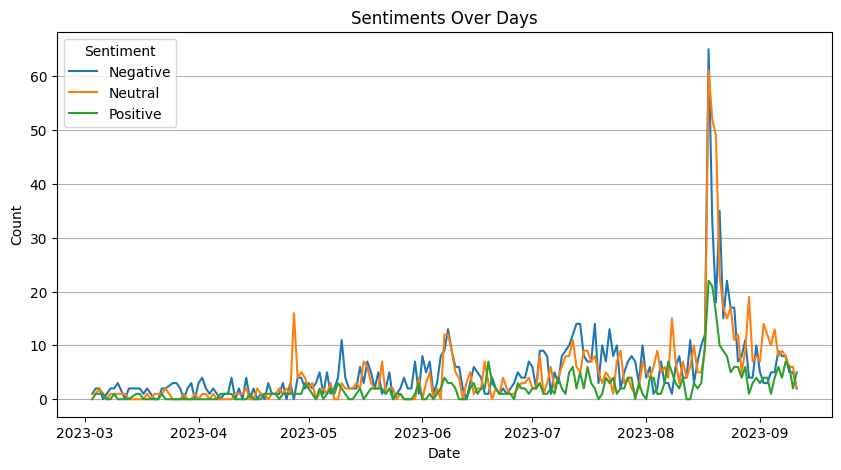

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

df['time'] = pd.to_datetime(df['created_utc'], unit='s')

daily_sentiments = df.groupby([df['time'].dt.date, 'title_sentiment']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 5))
for sentiment in ['Negative', 'Neutral', 'Positive']:
    plt.plot(daily_sentiments.index, daily_sentiments[sentiment], label=sentiment)

plt.title('Sentiments Over Days')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.grid(axis='y')
plt.show()